$$\frac{\partial \eta}{\partial t}=-\nabla( \vec{u}H)$$

In [2]:
import xarray as xr
import pyresample
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [8]:
src_dir = os.environ.get('srcdir')
print(src_dir)

sys.path.append(src_dir)

# always reload modules marked with "%aimport"
%load_ext autoreload
%autoreload 1

from features.resample import resample
%aimport features.resample

/home/ubuntu/bigStick/tidal_melting/src


/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [96]:
tpxo_grid_path = os.path.join(os.environ.get('extdir'),'tpxo','grid_tpxo7.2.nc')
tpxo_grid = xr.open_dataset(tpxo_grid_path)
waom_path = his_path = os.path.join(os.environ.get('rawdir'),'gdata','waom5_data','waom5_grd_rough.nc')
waom = xr.open_dataset(waom_path)

In [101]:
values = tpxo_grid.hz.values
lat_s = tpxo_grid.lat_z.values
lon_s = tpxo_grid.lon_z.values
lon_s[lon_s > 180] -= 360.0
print(lon_s.min(),lon_s.max())
tpxo_wct = resample(lon_s,lat_s,waom.lon_rho.values,waom.lat_rho.values,values)
tpxo_mask = resample(lon_s,lat_s,waom.lon_rho.values,waom.lat_rho.values,tpxo_grid.mz.values)

-179.75 180.0


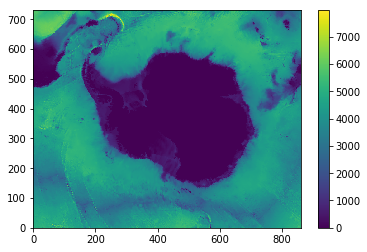

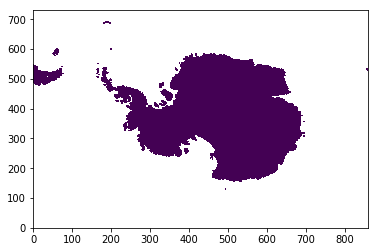

In [53]:
plt.close()
plt.pcolormesh(tpxo_wct)
plt.colorbar()
plt.show()
plt.close()
plt.pcolormesh(tpxo_mask)
plt.show()

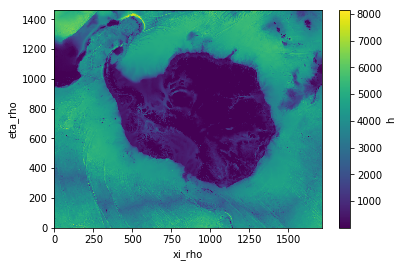

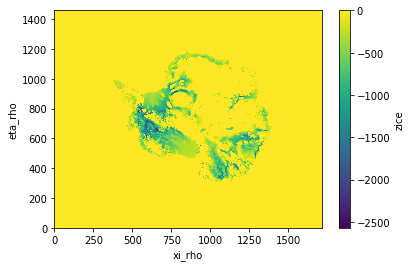

In [98]:
plt.close()
waom.h.plot()
plt.show()
waom.zice.plot()
plt.show()

In [99]:
waom_wct = waom.h + waom.zice

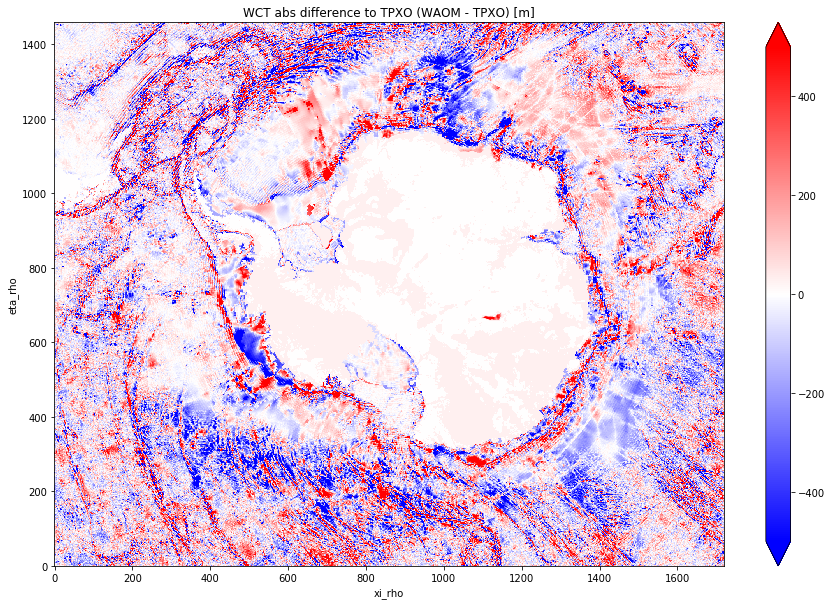

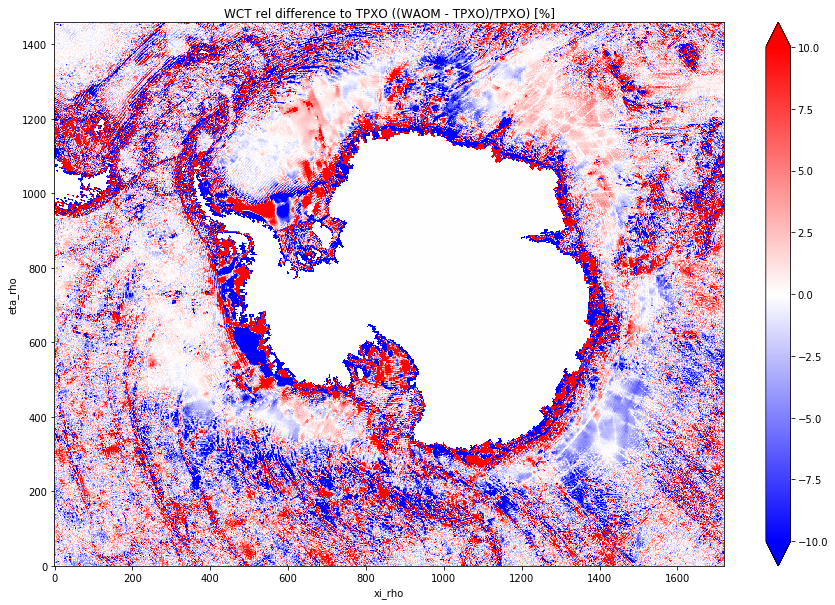

In [102]:
plt.close
(waom_wct - tpxo_wct).fillna(0).plot(size=10,vmin=-500,vmax=500,cmap=plt.cm.bwr)
plt.title('WCT abs difference to TPXO (WAOM - TPXO) [m]')
plt.show()
((waom_wct - tpxo_wct)/tpxo_wct*100).fillna(0).plot(size=10,vmin=-10,vmax=10,cmap=plt.cm.bwr)
plt.title('WCT rel difference to TPXO ((WAOM - TPXO)/TPXO) [%]')
plt.show()

In [82]:
print('Total Volume difference [%]: ',((waom_wct - tpxo_wct).sum()/tpxo_wct.sum()*100).values)
print('>=from scipy.ndimage.filters import gaussian_filter2000m Volume difference [%]: ',((waom_wct.where(waom_wct >= 2000).sum() - tpxo_wct[waom_wct >= 2000].sum())/tpxo_wct[waom_wct >= 2000].sum()*100).values)
print('<2000m Volume difference [%]: ',((waom_wct.where(waom_wct < 2000).sum() - tpxo_wct[waom_wct < 2000].sum())/tpxo_wct[waom_wct < 2000].sum()*100).values)

Total Volume difference [%]:  0.22788419734938786
>=2000m Volume difference [%]:  -0.015166673633360293
<2000m Volume difference [%]:  9.255146210444465


In [25]:
waom_wct = waom.h + waom.zeta.mean('ocean_time')

In [89]:
from scipy.ndimage.filters import gaussian_filter
diff = (waom_wct - tpxo_wct).fillna(0).copy()
diff.values = gaussian_filter(diff,5)

diffrel = ((waom_wct - tpxo_wct)/tpxo_wct*100).fillna(0).copy()
diffrel.values = gaussian_filter(diffrel,5)

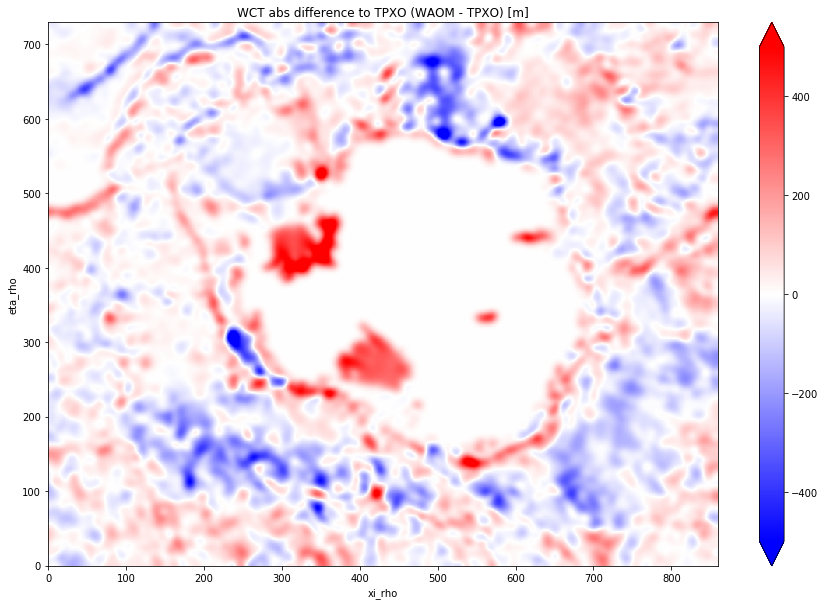

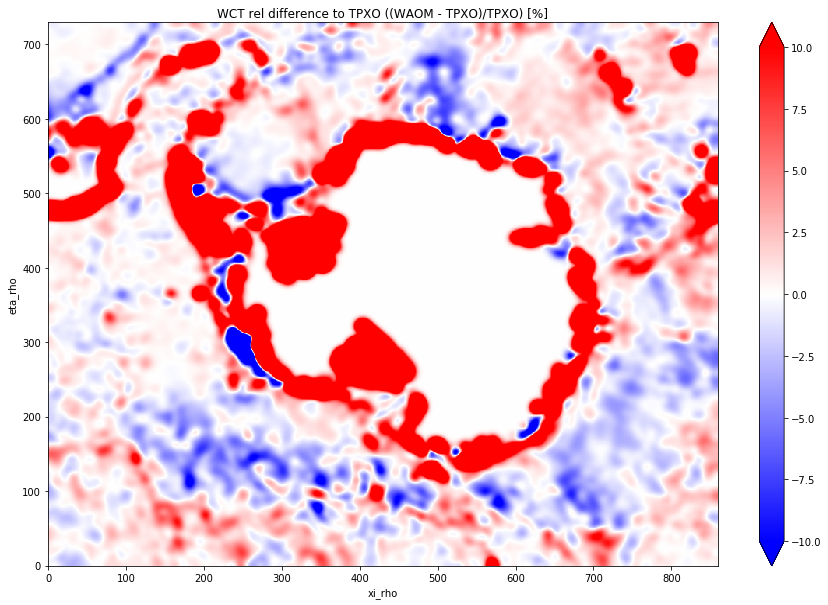

In [90]:
plt.close
diff.plot(size=10,vmin=-500,vmax=500,cmap=plt.cm.bwr)
plt.title('WCT abs difference to TPXO (WAOM - TPXO) [m]')
plt.show()
diffrel.plot(size=10,vmin=-10,vmax=10,cmap=plt.cm.bwr)
plt.title('WCT rel difference to TPXO ((WAOM - TPXO)/TPXO) [%]')
plt.show()